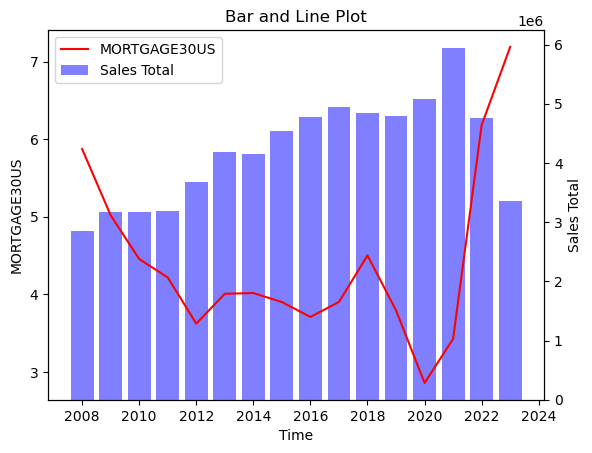

,SalesTotal,MORTGAGE30US
Date,,
2008-12-31,2856194.0,5.874545
2009-12-31,3177498.0,5.020000
2010-12-31,3168842.0,4.455000
2011-12-31,3193166.0,4.217500
2012-12-31,3671475.0,3.621667
2013-12-31,4179090.0,4.006667
2014-12-31,4152446.0,4.015833
2015-12-31,4534551.0,3.900000
2016-12-31,4775844.0,3.707500


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('resources/data_interpolated.csv')
city = 'United States'
df = df[df['CityName'] == city]
df = df[['Date', 'SalesTotal', 'MORTGAGE30US']]
df['MORTGAGE30US'] = df['MORTGAGE30US'].bfill()
df.dropna(subset=['SalesTotal'], inplace=True)

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
df = df.resample('Y').agg({'SalesTotal': 'sum', 'MORTGAGE30US': 'mean'})

# Plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Bar plot
bar = ax2.bar(df.index.year, df['SalesTotal'], color='blue', zorder=0, alpha=.5)

# Line plot
line, = ax1.plot(df.index.year, df['MORTGAGE30US'], color='red', zorder=1)

# Set labels and title
ax1.set_xlabel('Time')
ax1.set_ylabel('MORTGAGE30US')
ax2.set_ylabel('Sales Total')
plt.title('Bar and Line Plot')

# Add legends
plt.legend([line, bar], ['MORTGAGE30US', 'Sales Total'])

# Move the line plot to the front
ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

plt.show()



df.head(20)

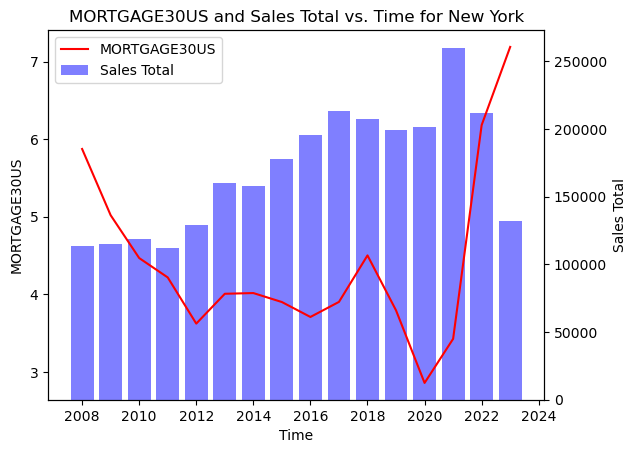

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_city_data(city):
    df = pd.read_csv('resources/data_interpolated.csv')
    df = df[df['CityName'] == city]
    df = df[['Date', 'SalesTotal', 'MORTGAGE30US']]
    df['MORTGAGE30US'] = df['MORTGAGE30US'].bfill()
    df.dropna(subset=['SalesTotal'], inplace=True)

    # Convert 'Date' to datetime and set it as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
    df = df.resample('Y').agg({'SalesTotal': 'sum', 'MORTGAGE30US': 'mean'})

    # Plot the data
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # Bar plot
    bar = ax2.bar(df.index.year, df['SalesTotal'], color='blue', zorder=0, alpha=.5)

    # Line plot
    line, = ax1.plot(df.index.year, df['MORTGAGE30US'], color='red', zorder=1)

    # Set labels and title
    ax1.set_xlabel('Time')
    ax1.set_ylabel('MORTGAGE30US')
    ax2.set_ylabel('Sales Total')
    plt.title('MORTGAGE30US and Sales Total vs. Time for ' + city)

    # Add legends
    plt.legend([line, bar], ['MORTGAGE30US', 'Sales Total'])

    # Move the line plot to the front
    ax1.set_zorder(ax2.get_zorder() + 1)
    ax1.patch.set_visible(False)

    plt.show()
plot_city_data('New York')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

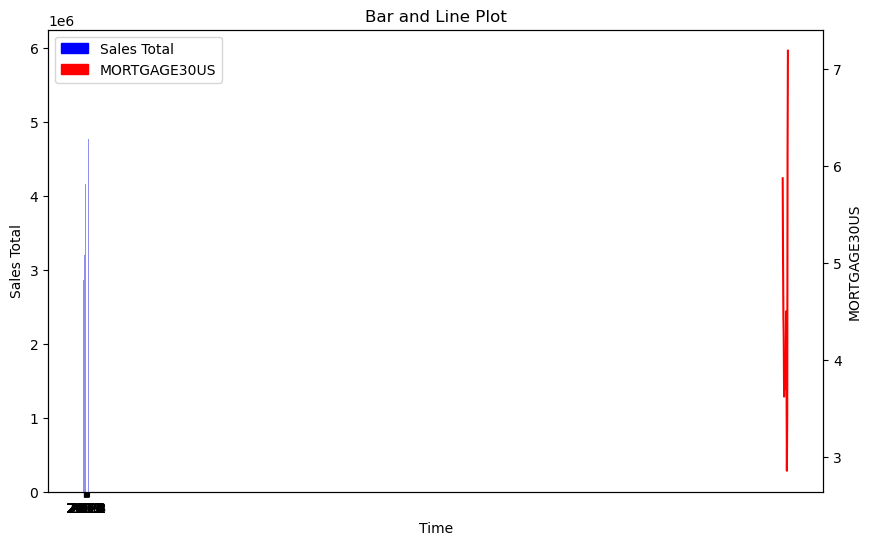

,Year,SalesTotal,MORTGAGE30US
0,2008,2856194.0,5.874545
1,2009,3177498.0,5.020000
2,2010,3168842.0,4.455000
3,2011,3193166.0,4.217500
4,2012,3671475.0,3.621667
5,2013,4179090.0,4.006667
6,2014,4152446.0,4.015833
7,2015,4534551.0,3.900000
8,2016,4775844.0,3.707500
9,2017,4938799.0,3.901667


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load and preprocess the data
df = pd.read_csv('resources/data_interpolated.csv')
city = 'United States'
df = df[df['CityName'] == city]
df = df[['Date', 'SalesTotal', 'MORTGAGE30US']]
df['MORTGAGE30US'] = df['MORTGAGE30US'].bfill()
df.dropna(subset=['SalesTotal'], inplace=True)

# Convert 'Date' to datetime and extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
df = df.groupby('Year').agg({'SalesTotal': 'sum', 'MORTGAGE30US': 'mean'}).reset_index()

# Convert 'Year' to integer
df['Year'] = df['Year'].astype(int)

# Create a bar plot
plt.figure(figsize=(10,6))
bar = sns.barplot(x='Year', y='SalesTotal', data=df, color='blue', alpha=0.5)

# Create a line plot on the second y-axis
ax2 = plt.twinx()
sns.lineplot(x='Year', y='MORTGAGE30US', data=df, color='red', ax=ax2)

# Set labels and title
plt.title('Bar and Line Plot')
bar.set(xlabel='Time', ylabel='Sales Total')
ax2.set_ylabel('MORTGAGE30US')

# Create custom patches for the legend
blue_patch = mpatches.Patch(color='blue', label='Sales Total')
red_line = mpatches.Patch(color='red', label='MORTGAGE30US')

# Add the legend
plt.legend(handles=[blue_patch, red_line])

plt.show()

# Display the first 20 rows of the DataFrame
df.head(20)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

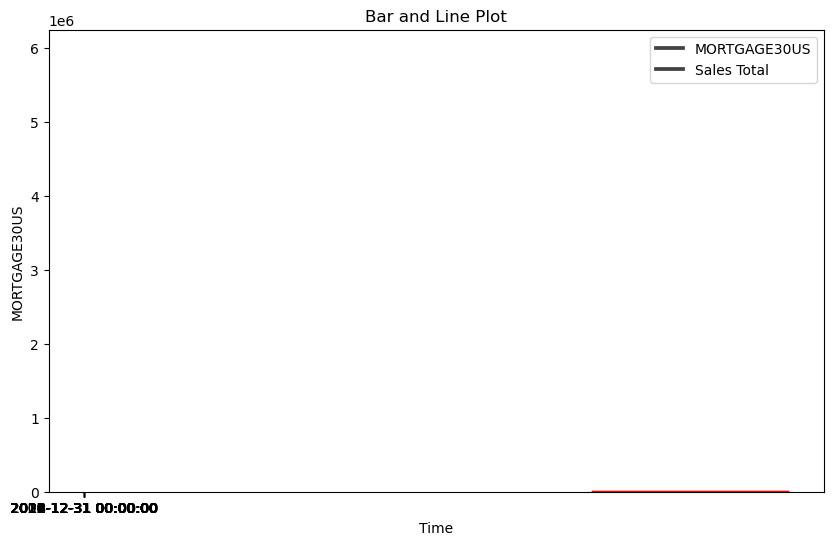

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('resources/data_interpolated.csv')
city = 'United States'
df = df[df['CityName'] == city]
df = df[['Date', 'SalesTotal', 'MORTGAGE30US']]
df['MORTGAGE30US'] = df['MORTGAGE30US'].bfill()
df.dropna(subset=['SalesTotal'], inplace=True)

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
df = df.resample('Y').agg({'SalesTotal': 'sum', 'MORTGAGE30US': 'mean'}).reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
sns.barplot(data=df, x='Date', y='SalesTotal', color='blue', alpha=0.5, ax=ax)

# Line plot
sns.lineplot(data=df, x='Date', y='MORTGAGE30US', color='red', ax=ax)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('MORTGAGE30US')
ax.set_title('Bar and Line Plot')

# Add legends
ax.legend(['MORTGAGE30US', 'Sales Total'])

plt.show()